# `Football Analytics`

### Import libraries

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from mplsoccer import Pitch, Sbopen, VerticalPitch

### Draw a pitch

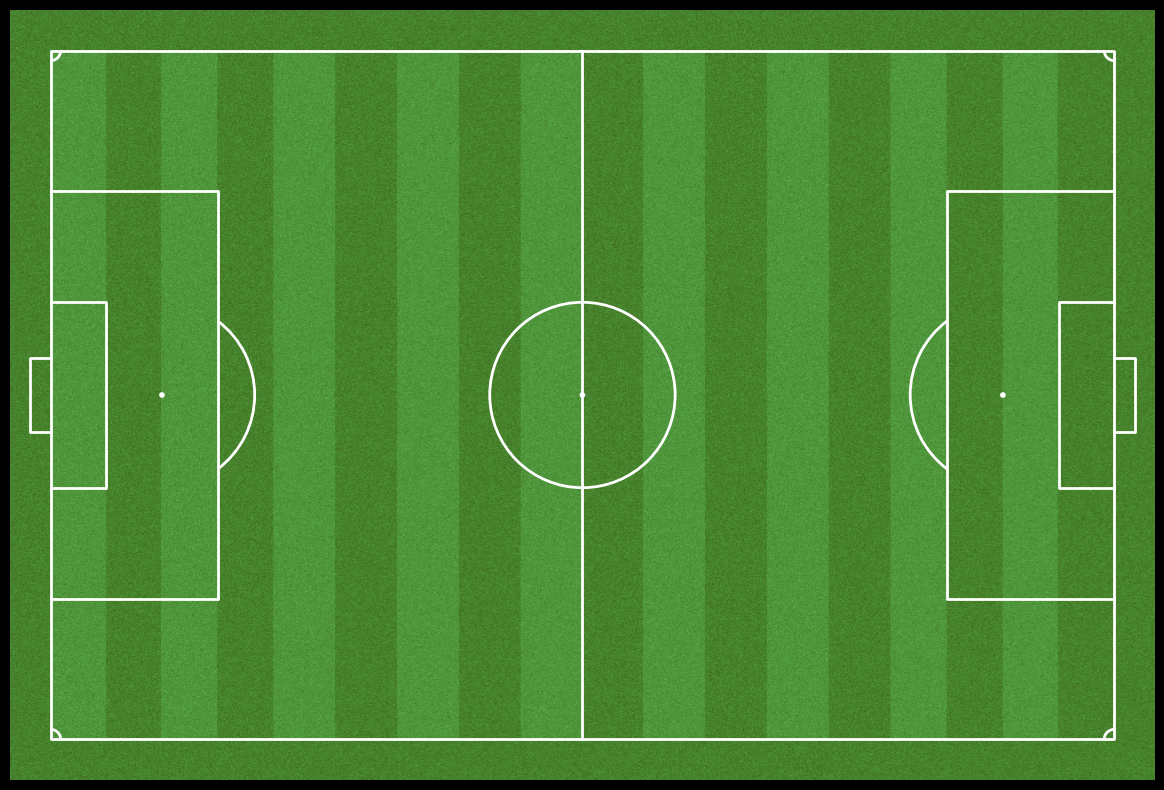

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='uefa', pitch_color='grass', line_color='white', goal_type='box', stripe=True, corner_arcs=True)
pitch.draw(ax=ax)

plt.show()

### Pass map

In [6]:
parser  = Sbopen()
competitions = parser.competition()
competitions.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-05-21T03:36:44.090970,2024-05-21T03:38:27.534702,2024-05-21T03:38:27.534702,2024-05-21T03:36:44.090970
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-28T18:02:23.493027,None,None,2024-02-28T18:02:23.493027
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-05-13T13:14:25.239651,2021-06-13T16:17:31.694,None,2024-05-13T13:14:25.239651
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882


In [67]:
df['player_name'].unique()

array([nan, 'Antoine Griezmann', 'Tchouameni', 'Olivier Giroud', 'Molina',
       'Adrien Rabiot', 'Rodrigo De Paul', 'Cristian Romero',
       'Nicolas Otamendi', 'Ousmane Dembélé', 'Nicolas Tagliafico',
       'Alexis Mac Allister', 'Emiliano Martinez', 'Theo Hernandez',
       'Raphaël Varane', 'Jules Koundé', 'Lionel Messi', 'Angel Di Maria',
       'Julián Álvarez', 'Hugo Lloris', 'Dayotchanculle Upamecano',
       'Enzo Fernandez', 'Kylian Mbappe', 'Kolo Muani', 'Marcus Thuram',
       'Eduardo Camavinga', 'Marcos Javier Acuña', 'Kingsley Coman',
       'Montiel', 'Youssouf Fofana', 'Lautaro Martinez',
       'Leandro Paredes', 'Ibrahima Konaté', 'Paulo Dybala',
       'Alejandro Pezzella'], dtype=object)

In [7]:
df, df_related, df_freeze, df_tactics = parser.event(3869685)

In [8]:
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Lionel Andrés Messi Cuccittini', 'Lionel Messi') if x == 'Lionel Andrés Messi Cuccittini' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Rodrigo Javier De Paul', 'Rodrigo De Paul') if x == 'Rodrigo Javier De Paul' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Nicolás Hernán Otamendi', 'Nicolas Otamendi') if x == 'Nicolás Hernán Otamendi' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Aurélien Djani Tchouaméni', 'Tchouameni') if x == 'Aurélien Djani Tchouaméni' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Cristian Gabriel Romero', 'Cristian Romero') if x == 'Cristian Gabriel Romero' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Nicolás Alejandro Tagliafico', 'Nicolas Tagliafico') if x == 'Nicolás Alejandro Tagliafico' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Kylian Mbappé Lottin', 'Kylian Mbappe') if x == 'Kylian Mbappé Lottin' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Nahuel Molina Lucero', 'Molina') if x == 'Nahuel Molina Lucero' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Theo Bernard François Hernández', 'Theo Hernandez') if x == 'Theo Bernard François Hernández' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Ángel Fabián Di María Hernández', 'Angel Di Maria') if x == 'Ángel Fabián Di María Hernández' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Randal Kolo Muani', 'Kolo Muani') if x == 'Randal Kolo Muani' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Damián Emiliano Martínez', 'Emiliano Martinez') if x == 'Damián Emiliano Martínez' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Gonzalo Ariel Montiel', 'Montiel') if x == 'Gonzalo Ariel Montiel' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Leandro Daniel Paredes', 'Leandro Paredes') if x == 'Leandro Daniel Paredes' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Lautaro Javier Martínez', 'Lautaro Martinez') if x == 'Lautaro Javier Martínez' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Paulo Bruno Exequiel Dybala', 'Paulo Dybala') if x == 'Paulo Bruno Exequiel Dybala' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Germán Alejandro Pezzella', 'Alejandro Pezzella') if x == 'Germán Alejandro Pezzella' else x)

In [96]:
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

def drawPassMap(playername):
    mask_bronze = (df.type_name == 'Pass') & (df.player_name == playername)
    df_pass = df.loc[mask_bronze, ['x', 'y', 'end_x', 'end_y']]

    pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', goal_type='box', stripe=True, corner_arcs=True)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    fig.set_facecolor('black')
    
    pitch.arrows(df_pass.x, df_pass.y,
                 df_pass.end_x, df_pass.end_y, color="#83B4FF", ax=ax)
    pitch.scatter(df_pass.x, df_pass.y, alpha=0.3, s=300, color="white", ax=ax)
    pitch.draw(ax=ax)
    
    fig.suptitle(playername + "'s Pass Map", fontsize=24, fontweight='bold', fontfamily='Comic Sans MS', color='white')
    plt.show()


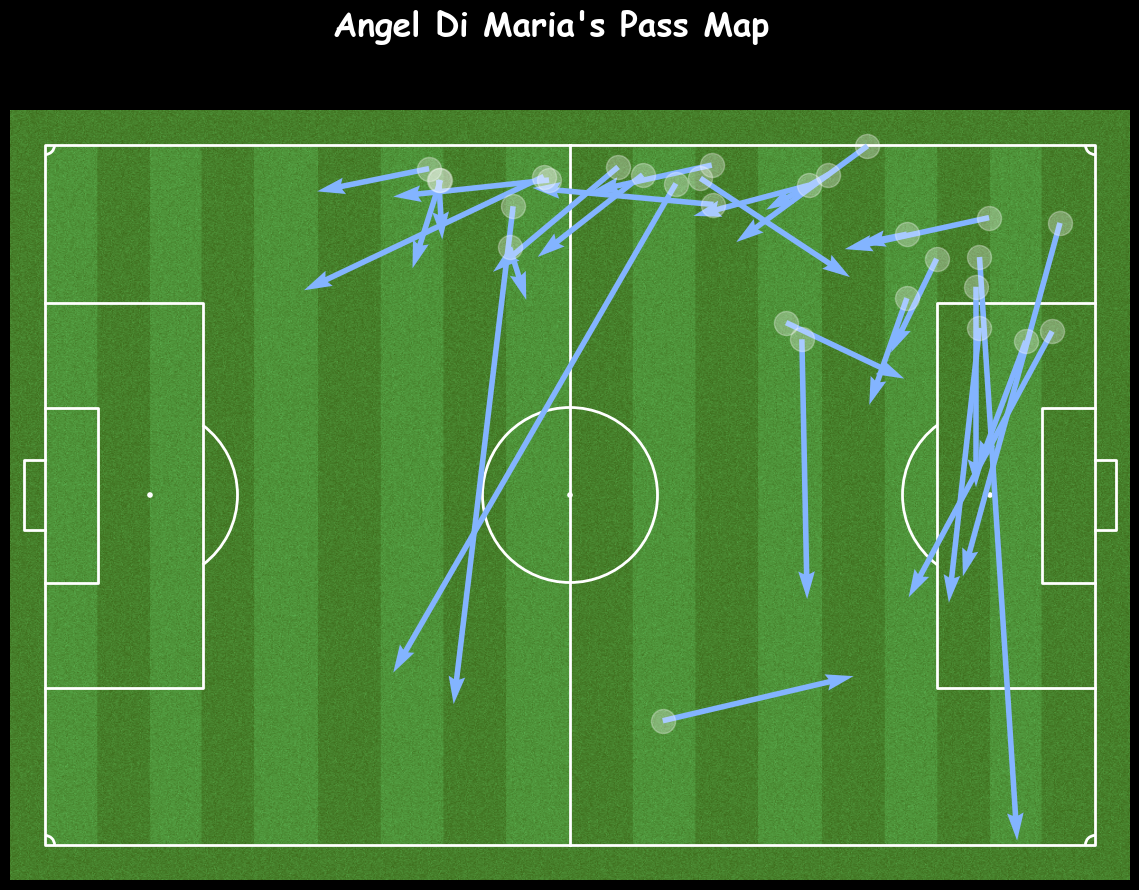

In [97]:
drawPassMap("Angel Di Maria")